In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('F:/ML Project/ML case Study - ML case Study.csv',header=0)

In [4]:
df1=pd.read_csv('F:/ML Project/Colleges - Colleges.csv',header=0)

In [5]:
df2=pd.read_csv('F:/ML Project/cities - cities.csv',header=0)

In [6]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [117]:
def assign_tier(college):
    if college in df1['Tier 1'].values:
        return '1'  
    elif college in df1['Tier 2'].values:
        return '2'  
    elif college in df1['Tier 3'].values:
        return '3'   
df['College'] = df['College'].apply(assign_tier)

In [118]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523,3,66,19,71406.58
1,2,Ajmer,Executive,57081,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,3,Ajmer,Executive,49010,2,81,33,82092.39
4,1,Durgapur,Executive,57879,4,74,32,73878.10


In [119]:
def assign_city(City):
    if City in df2['Metrio City'].values:
        return '1'  
    elif City in df2['non-metro cities'].values:
        return '0'    
df['City'] = df['City'].apply(assign_city)

In [120]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523,3,66,19,71406.58
1,2,0,Executive,57081,1,84,18,68005.87
2,3,0,Executive,60347,2,52,28,76764.02
3,3,0,Executive,49010,2,81,33,82092.39
4,1,0,Executive,57879,4,74,32,73878.10
5,2,0,Executive,54340,4,73,31,59950.89
6,3,1,Executive,60298,1,42,46,66602.34
7,2,1,Executive,49944,2,56,37,57768.44
8,3,1,Executive,53124,4,40,37,70083.30
9,1,0,Executive,51141,1,47,60,85648.48


### Check for Missing values

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


#### No Missing values (So No need of Missing values treatment)

### Checking For NULL Values

In [122]:
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

### Dummy varaibles

In [123]:
df=pd.get_dummies(df,columns=['Role'],drop_first=True).astype(int)

In [124]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523,3,66,19,71406,1
1,2,0,57081,1,84,18,68005,0
2,3,0,60347,2,52,28,76764,0
3,3,0,49010,2,81,33,82092,0
4,1,0,57879,4,74,32,73878,0


### Fnding Correlation between varaibles

In [125]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.257998,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005449,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301117,-0.026751
CTC,-0.029592,-0.020365,0.257998,0.011370,-0.005449,0.301117,1.000000,0.621310
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621310,1.000000


#### We have small data no need of any removals of varaibles ( No risk of Multi Collinearity)

In [126]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75352.790434,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.293679,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000,1.000000


### Outliers Treatment

In [127]:
import seaborn as sns

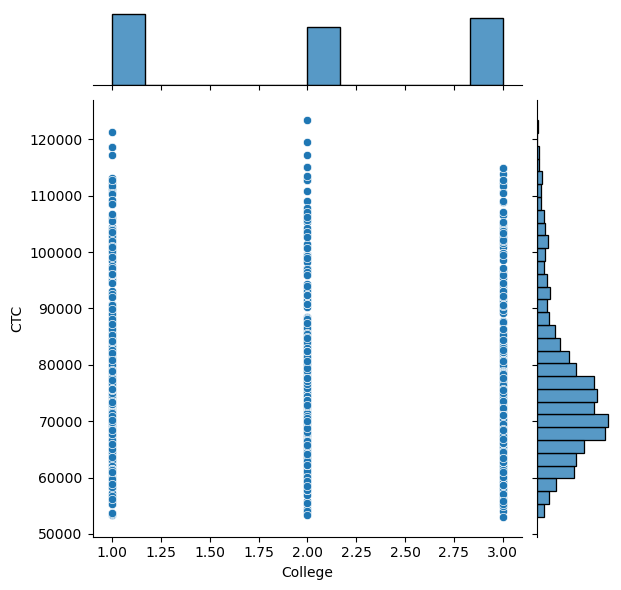

In [128]:
sns.jointplot(x='College',y='CTC',data=df)

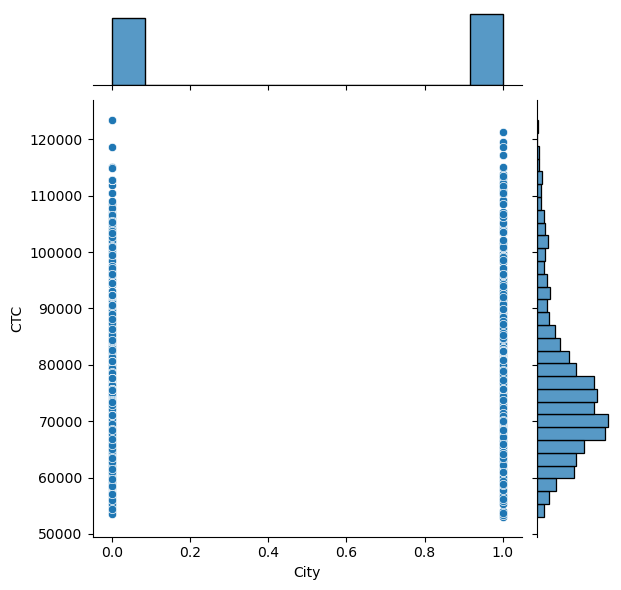

In [129]:
sns.jointplot(x='City',y='CTC',data=df)

#### After Several Iteration we didnt see any Outliers (So Outliers treatment is not required) 

 ### X and Y split

In [130]:
X=df.loc[:,df.columns!='CTC']

In [131]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523,3,66,19,1
1,2,0,57081,1,84,18,0
2,3,0,60347,2,52,28,0
3,3,0,49010,2,81,33,0
4,1,0,57879,4,74,32,0


In [132]:
Y=df['CTC']

In [133]:
Y.head()

0    71406
1    68005
2    76764
3    82092
4    73878
Name: CTC, dtype: int32

#### Splits happened based on Dependancy

### Splitting into train and test data

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [136]:
print(X_train.shape)
print(Y_train.shape)

(1271, 7)
(1271,)


In [137]:
print(X_test.shape)
print(Y_test.shape)

(318, 7)
(318,)


### Model the data
 ### 1) Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
LR=LinearRegression()

In [140]:
LR.fit(X_train,Y_train)

LinearRegression()

In [141]:
print(LR.coef_,LR.intercept_)

[-5.17506078e+02  4.82819963e+02  4.22240508e-01  8.73566281e+00
  1.94069240e+00  2.43719557e+02  1.86020613e+04] 39229.150954821365


In [142]:
y_test_pred=LR.predict(X_test)

In [143]:
y_train_pred=LR.predict(X_train)

### Evaluating Model Performance

In [144]:
from sklearn.metrics import r2_score,mean_squared_error

In [145]:
r2_score(Y_test,y_test_pred)

0.5933515097281491

In [146]:
r2_score(Y_train,y_train_pred)

0.5137734046204612

In [147]:
mean_squared_error(Y_train,y_train_pred)

73096551.52229236

In [148]:
mean_squared_error(Y_test,y_test_pred)

77362921.92796244

# Summary

#### Linear Regression is not suitable for those models which have more then two categories in it
#### So This Model cant be Preferred for this data

### Ridge Regression

In [162]:
from sklearn import preprocessing

#### The independent values should be scaled

In [163]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [164]:
X_train_s = scaler.transform(X_train)
X_test_s =scaler.transform(X_test)

In [167]:
from sklearn.linear_model import Ridge
lm_r = Ridge(alpha = 0.2)
lm_r.fit(X_train_s,Y_train)

Ridge(alpha=0.2)

 #### r2 score evalution 

In [168]:
r2_score(Y_test,lm_r.predict(X_test_s))

0.5933241789948975

#### Vadilation Curve to determine the best alpha value which gives more accuracy

In [169]:
from sklearn.model_selection import validation_curve

In [173]:
params_range = np.logspace(-2,8,100)

In [174]:
params_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [175]:
train_scores, test_scores = validation_curve(Ridge(),X_train_s,Y_train,param_name='alpha',param_range=params_range,scoring='r2')

In [176]:
print(train_scores, test_scores)

[[5.10978086e-01 5.36435743e-01 4.99878149e-01 5.14326034e-01
  5.09287803e-01]
 [5.10978086e-01 5.36435743e-01 4.99878149e-01 5.14326034e-01
  5.09287803e-01]
 [5.10978086e-01 5.36435743e-01 4.99878149e-01 5.14326034e-01
  5.09287803e-01]
 [5.10978086e-01 5.36435743e-01 4.99878149e-01 5.14326034e-01
  5.09287803e-01]
 [5.10978086e-01 5.36435743e-01 4.99878149e-01 5.14326034e-01
  5.09287803e-01]
 [5.10978086e-01 5.36435742e-01 4.99878149e-01 5.14326034e-01
  5.09287802e-01]
 [5.10978086e-01 5.36435742e-01 4.99878148e-01 5.14326033e-01
  5.09287802e-01]
 [5.10978085e-01 5.36435742e-01 4.99878148e-01 5.14326033e-01
  5.09287802e-01]
 [5.10978084e-01 5.36435741e-01 4.99878147e-01 5.14326032e-01
  5.09287801e-01]
 [5.10978083e-01 5.36435740e-01 4.99878146e-01 5.14326031e-01
  5.09287800e-01]
 [5.10978081e-01 5.36435738e-01 4.99878144e-01 5.14326029e-01
  5.09287798e-01]
 [5.10978078e-01 5.36435735e-01 4.99878141e-01 5.14326026e-01
  5.09287795e-01]
 [5.10978073e-01 5.36435730e-01 4.998781

In [177]:
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis =1)

In [178]:
max(train_mean)

0.5141811630515501

In [179]:
max(test_mean)

0.5029650077504569

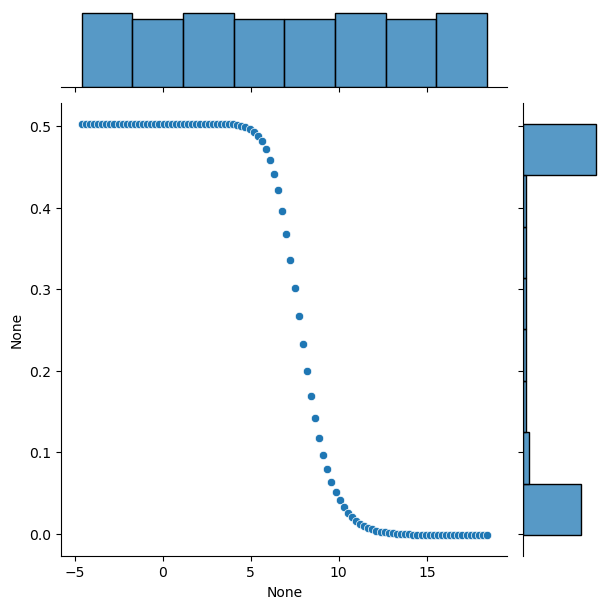

In [181]:
sns.jointplot(x=np.log(params_range), y=test_mean)

### finding where we have maximum efficency

In [182]:
np.where(test_mean ==max(test_mean))

(array([28], dtype=int64),)

In [183]:
params_range[28]

6.7341506577508214

#### Fitting the model

In [184]:
lm_r_best=Ridge(alpha=params_range[28])

In [185]:
lm_r_best.fit(X_train_s,Y_train)

Ridge(alpha=6.7341506577508214)

#### Its time to evalute the performance

In [188]:
r2_score(Y_test,lm_r_best.predict(X_test_s))

0.5924247111753427

In [189]:
r2_score(Y_train,lm_r_best.predict(X_train_s))

0.5137594844518283

### Regression Tree 

In [190]:
from sklearn import tree

In [191]:
dtr= tree.DecisionTreeRegressor(max_depth = 3)

In [193]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

#### Model Performance

In [195]:
from sklearn.metrics import r2_score, mean_squared_error

In [198]:
mean_squared_error(Y_test,dtr.predict(X_test))

77065777.29092808

In [199]:
r2_score(Y_train,dtr.predict(X_train))

0.6062943355764511

In [200]:
r2_score(Y_test,dtr.predict(X_test))

0.5949134132218526

#### Showing how the Decision Tree is Plotted

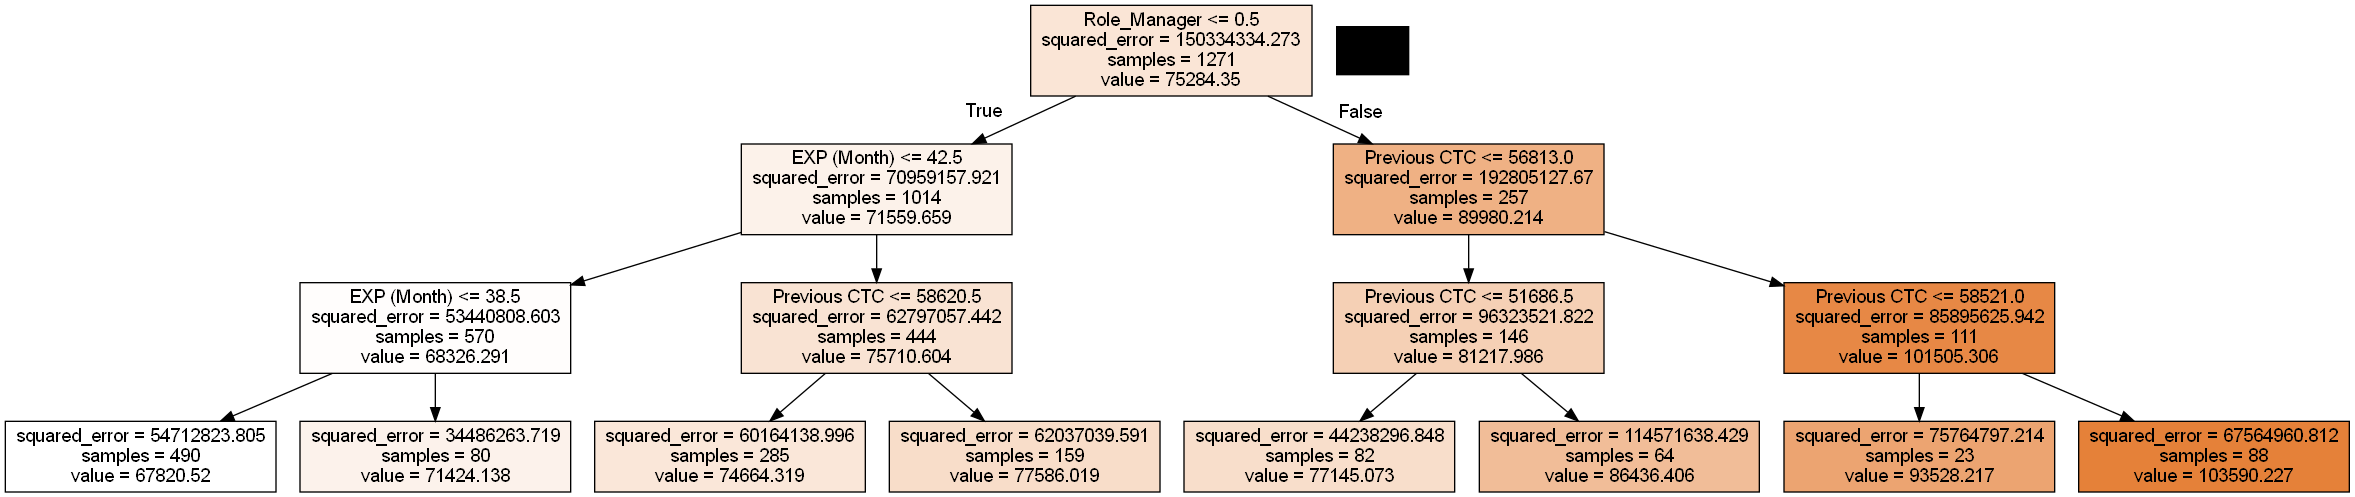

In [201]:
dot_data = tree.export_graphviz(dtr,out_file =None, feature_names = X_train.columns , filled =True)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### And in decision Tree we have Ensembling tecniques also ( By using that Techniques we can improve the model performance)

### Decision  Bagging Regressor

In [202]:
from sklearn.ensemble import BaggingRegressor

In [203]:
ba_dtr = tree.DecisionTreeRegressor()

In [206]:
dtr_bag = BaggingRegressor(ba_dtr, n_estimators = 1000, bootstrap= True, n_jobs = -1, random_state = 1)

In [207]:
dtr_bag.fit(X_train,Y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=1)

In [208]:
r2_score(Y_train,dtr_bag.predict(X_train))

0.9500115582543533

In [209]:
r2_score(Y_test,dtr_bag.predict(X_test))

0.6378282952063477

### Decision Random Forest

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)

#### The biggest advantages we have here is using gridsearchcv Operations (The Best Estimators are Considered) 
#### Which in Other words called Minimize Hyperparameters

In [219]:
from sklearn.model_selection import GridSearchCV

In [213]:
parameters= {"max_features":[2,3,4,5,6,7,8,9],
          "min_samples_split":[2,3,4,6,10,12]}

In [214]:
grid_search = GridSearchCV(rf,parameters,n_jobs=-1,cv = 5, scoring='r2')

In [217]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000, random_state=1),
             n_jobs=-1,
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 6, 10, 12]},
             scoring='r2')

In [220]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [222]:
best_rf = grid_search.best_estimator_

In [223]:
r2_score(Y_train,best_rf.predict(X_train))

0.9502818783280477

In [224]:
r2_score(Y_test,best_rf.predict(X_test))

0.6460334664079872

### Boosting Techniqes
#### Gradient Boosting

In [225]:
from sklearn.ensemble import GradientBoostingRegressor

In [226]:
gb = GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.01)

In [227]:
gb.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000)

In [228]:
r2_score(Y_train,gb.predict(X_train))

0.8681879949751969

In [229]:
r2_score(Y_test,gb.predict(X_test))

0.6405007336686239

#### Ada Boosting

In [230]:
from sklearn.ensemble import AdaBoostRegressor

In [231]:
ada = AdaBoostRegressor(learning_rate=0.01,n_estimators = 5000)

In [232]:
ada.fit(X_train,Y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=5000)

In [233]:
r2_score(Y_train,ada.predict(X_train))

0.6202994032023761

In [234]:
r2_score(Y_test,ada.predict(X_test))

0.6083338119847559

#### XG Boosting

In [236]:
import xgboost as xgb

In [237]:
xgb_r =xgb.XGBRegressor(learning_rate=0.01, n_estimators = 5000)

In [238]:
xgb_r.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [239]:
r2_score(Y_train,xgb_r.predict(X_train))

0.9965680392990236

In [240]:
r2_score(Y_test,xgb_r.predict(X_test))

0.6193507929113541

#### By Modelling the data in this many regressions we have got max accuracy in Random Forest (By using the hyperparameters of GridSearchCV method)

# 1)- Your views about the problem statement?

# 2)- What will be your approach to solving this task?

# 3)- What were the available ML model options you had to perform this task?

# 4)-Which model’s performance is best and what could be the possible reason for that?

# 5)- What steps can you take to improve this selected model’s performance even further?